In [ ]:
!pip install kneed

In [ ]:
from sklearn.cluster import DBSCAN
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/football_data.csv"

data = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_columns=set()
for i in data.columns:
  all_columns.add(i)

numeric_columns=set()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in data.select_dtypes(include=numerics):
  numeric_columns.add(i)

print(all_columns.difference(numeric_columns))

{'CDM', 'Contract Valid Until', 'RB', 'Body Type', 'RDM', 'LM', 'Work Rate', 'CM', 'Wage', 'RW', 'Joined', 'Photo', 'RM', 'ST', 'LS', 'Weight', 'CAM', 'LF', 'RF', 'Loaned From', 'LCB', 'Club Logo', 'Release Clause', 'CF', 'RAM', 'RWB', 'Flag', 'Height', 'Value', 'RS', 'RCM', 'CB', 'LB', 'Preferred Foot', 'LWB', 'LCM', 'LAM', 'LW', 'Real Face', 'Position', 'Name', 'Nationality', 'Club', 'LDM', 'RCB'}


In [ ]:
data=data.select_dtypes(['number']) 

In [ ]:
print(len(data.columns))

44


In [ ]:
for i in data:
  data[i].fillna(data[i].mean(skipna=True), inplace = True)

In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')


In [ ]:
data=data.drop(['ID', 'Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Jersey Number', 'Unnamed: 0'],axis=1)

In [ ]:
print(len(data.columns))

36


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [ ]:
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

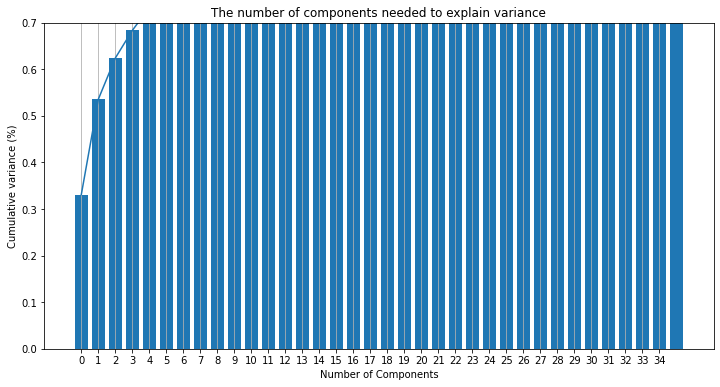

In [ ]:
pca = PCA().fit(X_normalized)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 36, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,0.7)
plt.bar(xi, y)

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 35, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.plot(xi,y)

plt.axhline(y=0.95, color='r')

ax.grid(axis='x')
plt.show()

** From the above computation, 95% variance is caputred by 26 features and above **

In [ ]:
pca = PCA(2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)


In [ ]:
X_principal

,0,1
0,-0.804524,0.269649
1,-0.767098,0.160565
2,-0.782390,0.280821
3,0.640590,0.253590
4,-0.811563,-0.049520
...,...,...
18202,0.752831,0.248192
18203,0.798750,0.440023
18204,0.595118,0.685794
18205,0.534565,0.615302


With 2 as minsample points

In [ ]:
print(len(data))

18207


In [ ]:
neighbors = NearestNeighbors(n_neighbors=72)
neighbors_fit = neighbors.fit(X_principal)
distances, indices = neighbors_fit.kneighbors(X_principal)

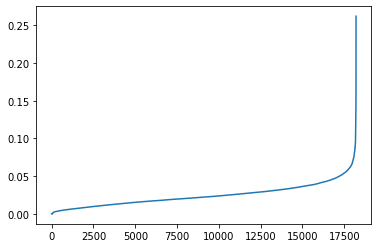

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

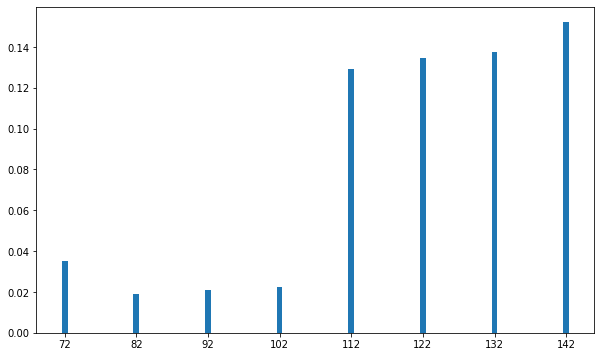

In [ ]:
x_axis=[]
y_axis=[]
for i in range(72,150,10):
  clustering = DBSCAN(eps=0.075, min_samples=i).fit(X_principal)
  x_axis.append(i)
  core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
  core_samples_mask[clustering.core_sample_indices_] = True
  labels = clustering.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  unique_labels = set(labels)
  y_axis.append(metrics.silhouette_score(X_principal, labels))
for i in range(0,len(y_axis)):
  if(y_axis[i]<0):
    y_axis[i]=0
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x_axis,y_axis)
plt.xticks(x_axis, x_axis)
plt.show()


In [ ]:
for i in range(len(x_axis)):
  if(y_axis[i]==max(y_axis)):
    print("min_sample_points", x_axis[i])
    break

min_sample_points 142


Silhouette Coefficient: 0.152
['y', 'b', 'g', 'r']


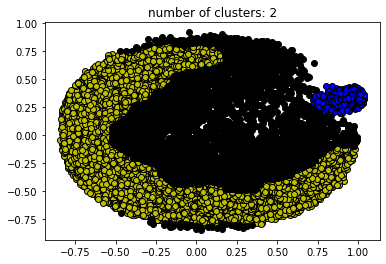

In [ ]:
clustering = DBSCAN(eps=0.075, min_samples=142).fit(X_principal)
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels1 = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_principal, labels)) 
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X_principal[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X_principal[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
def intra_similarity(labels):
  c1=[]
  c2=[]
  c3=[]
  for sample,each  in zip(data.values,labels):
    if(each==0):
      c1.append(sample)
    elif(each==1):
      c2.append(sample)
    else:
      c3.append(sample)
  c1=np.array(c1)
  c2=np.array(c2)
  c3=np.array(c3)


  avg_c1=np.average(c1,axis=0)
  avg_c2=np.average(c2,axis=0)
  avg_c3=np.average(c3,axis=0)

  c1_intra=np.sum(np.sqrt(np.sum(np.square(c1-avg_c1),axis=1)),axis=0)/c1.shape[0]
  c2_intra=np.sum(np.sqrt(np.sum(np.square(c2-avg_c2),axis=1)),axis=0)/c2.shape[0]
  c3_intra=np.sum(np.sqrt(np.sum(np.square(c3-avg_c3),axis=1)),axis=0)/c3.shape[0]


  final_avg=[round(c1_intra,2),round(c2_intra,2),round(c3_intra,2)]
  return final_avg

  

In [ ]:
intra_similarity(labels1)

[72.36, 45.01, 62.18]

In [ ]:
x=['c1','c2','c3']
y=intra_similarity(labels1)

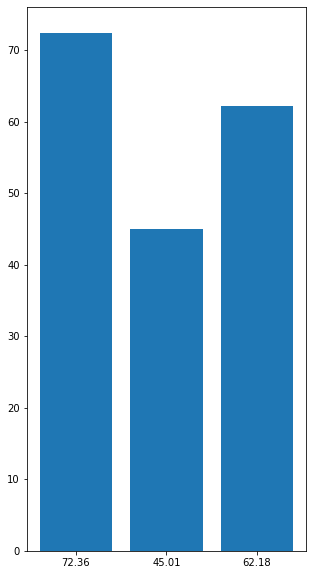

In [ ]:
fig, ax = plt.subplots(figsize=(5, 10))
ax.bar(x,y)
plt.xticks(x, y)
plt.show()

In [ ]:
def inter_similarity(labels):
  c1=[]
  c2=[]
  c3=[]
  for sample,each  in zip(data.values,labels):
    if(each==0):
      c1.append(sample)
    elif(each==1):
      c2.append(sample)
    else:
      c3.append(sample)
  c1=np.array(c1)
  c2=np.array(c2)
  c3=np.array(c3)

  avg_c1=np.average(c1,axis=0)
  avg_c2=np.average(c2,axis=0)
  avg_c3=np.average(c3,axis=0)
  
  inter_simi=np.sqrt(np.sum(np.square(avg_c2-avg_c1)))+np.sqrt(np.sum(np.square(avg_c2-avg_c3)))+np.sqrt(np.sum(np.square(avg_c3-avg_c1)))
  return inter_simi


In [ ]:
inter_similarity(labels1)

453.18078184129047

Silhouette Coefficient: 0.125
['y', 'b', 'g', 'r']


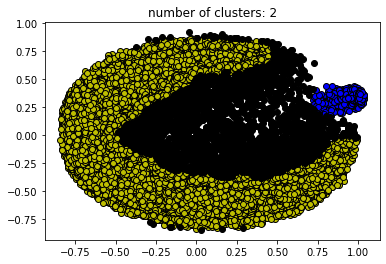

In [ ]:
clustering = DBSCAN(eps=0.075, min_samples=110).fit(X_principal)
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_principal, labels)) 
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X_principal[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X_principal[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

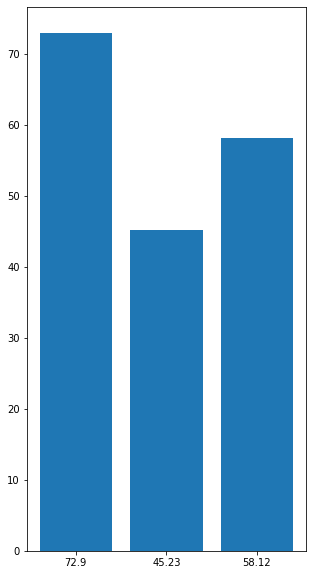

In [ ]:
intra_similarity(labels)
x=['c1','c2','c3']
y=intra_similarity(labels)
fig, ax = plt.subplots(figsize=(5, 10))
ax.bar(x,y)
plt.xticks(x, y)
plt.show()

In [ ]:
inter_similarity(labels)

445.30968490384214

Silhouette Coefficient: 0.018
['y', 'b', 'g', 'r']


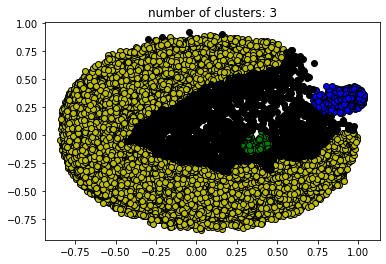

In [ ]:
clustering = DBSCAN(eps=0.075, min_samples=90).fit(X_principal)
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_principal, labels)) 
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X_principal[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X_principal[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

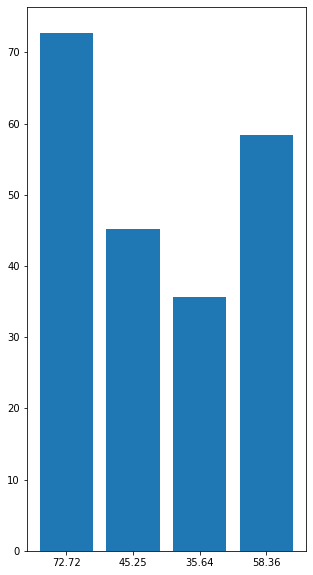

In [ ]:
def intra_similarity(labels):
  c1=[]
  c2=[]
  c3=[]
  c4=[]
  for sample,each  in zip(data.values,labels):
    if(each==0):
      c1.append(sample)
    elif(each==1):
      c2.append(sample)
    elif(each==2):
      c3.append(sample)
    else:
      c4.append(sample)
  c1=np.array(c1)
  c2=np.array(c2)
  c3=np.array(c3)
  c4=np.array(c4)

  avg_c1=np.average(c1,axis=0)
  avg_c2=np.average(c2,axis=0)
  avg_c3=np.average(c3,axis=0)
  avg_c4=np.average(c3,axis=0)

  c1_intra=np.sum(np.sqrt(np.sum(np.square(c1-avg_c1),axis=1)),axis=0)/c1.shape[0]
  c2_intra=np.sum(np.sqrt(np.sum(np.square(c2-avg_c2),axis=1)),axis=0)/c2.shape[0]
  c3_intra=np.sum(np.sqrt(np.sum(np.square(c3-avg_c3),axis=1)),axis=0)/c3.shape[0]
  c4_intra=np.sum(np.sqrt(np.sum(np.square(c4-avg_c3),axis=1)),axis=0)/c4.shape[0]


  final_avg=[round(c1_intra,2),round(c2_intra,2),round(c3_intra,2),round(c4_intra,2)]
  return final_avg

intra_similarity(labels)
x=['c1','c2','c3','c4']
y=intra_similarity(labels)
fig, ax = plt.subplots(figsize=(5, 10))
ax.bar(x,y)
plt.xticks(x, y)
plt.show()

In [ ]:
def inter_similarity(labels):
  c1=[]
  c2=[]
  c3=[]
  c4=[]
  for sample,each  in zip(data.values,labels):
    if(each==0):
      c1.append(sample)
    elif(each==1):
      c2.append(sample)
    elif(each==2):
      c3.append(sample)
    else:
      c4.append(sample)
  c1=np.array(c1)
  c2=np.array(c2)
  c3=np.array(c3)
  c4=np.array(c4)

  avg_c1=np.average(c1,axis=0)
  avg_c2=np.average(c2,axis=0)
  avg_c3=np.average(c3,axis=0)
  avg_c4=np.average(c4,axis=0)


  
  inter_simi=np.sqrt(np.sum(np.square(avg_c2-avg_c1)))+np.sqrt(np.sum(np.square(avg_c3-avg_c2)))+np.sqrt(np.sum(np.square(avg_c3-avg_c1)))+np.sqrt(np.sum(np.square(avg_c3-avg_c4)))+np.sqrt(np.sum(np.square(avg_c1-avg_c4)))+np.sqrt(np.sum(np.square(avg_c2-avg_c4)))
  return inter_simi
inter_similarity(labels)

688.6100803651599